### 数据挖掘大致流程
1. **数据探索性分析 👈**
2. 特征工程
3. 建模调参
4. 模型融合

### 当前阶段目标——了解数据
1. 了解数据全局属性：类型、大小
2. 了解数据分布
3. 初步分离出重要的特征
4. 进行独立性和相关性分析

In [68]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns

In [3]:
train_data = pd.read_csv('used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv('used_car_testA_20200313.csv',sep=' ')

In [96]:
train_data.shape

(150000, 31)

In [95]:
# 去重后还是一样
train_data.drop_duplicates(subset=None, keep='first', inplace=True)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

### 字段统计信息
1. 可以发现以下四个字段存在空值（如果选取这些字段作为模型的输入变量，则需要着重处理这些空值）：    
**model bodyType fuelType gearbox**    
如何处理空值，见特征工程部分：https://zhuanlan.zhihu.com/p/93428394
2. 数据集大小为：35.5M 15000行、31列

In [5]:
# 查看具体数据
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [6]:
train_data.tail()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [7]:
train_data.sample(5)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
26258,26258,34161,19990406,33.0,10,3.0,1.0,0.0,102,15.0,0.0,5177,0,0,20160305,4000,44.908598,2.638598,-0.691650,0.497214,-1.416056,0.271939,0.082648,0.074568,0.041895,0.022178,-2.727565,0.375966,-0.779525,-1.377208,-0.357449
17872,17872,14969,20061108,87.0,3,2.0,0.0,1.0,150,12.5,1.0,5762,0,0,20160319,2500,45.938591,4.809214,0.418792,-0.551480,1.210327,0.246010,0.114495,0.098054,0.058175,0.097805,-4.913819,1.360098,0.603305,0.829240,-2.132261
46553,46553,180513,20021107,19.0,21,0.0,2.0,0.0,0,15.0,0.0,4100,0,0,20160404,1699,44.043959,-3.196976,-0.957222,0.941223,-0.817727,0.263217,0.000000,0.097725,0.051169,0.042333,2.818596,-1.680828,-0.869253,-1.055412,-0.096735
66260,66260,56676,20050206,106.0,6,3.0,1.0,1.0,116,15.0,0.0,24,0,0,20160405,4700,44.471217,4.149710,-0.794722,0.293356,0.537596,0.257654,0.103367,0.037676,0.043366,0.079034,-3.909114,1.188490,-1.225629,0.678279,0.018959
60406,60406,29654,20100902,44.0,0,3.0,1.0,0.0,140,15.0,0.0,1621,0,0,20160308,11500,46.528365,-3.178857,0.039542,-2.584445,-0.693174,0.265826,0.000589,0.096144,0.100697,0.036567,1.620454,-3.125062,3.040120,-0.270950,0.516714


In [78]:
# 数值数据     查看描述统计特征
# train_data.describe(include = 'all')
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


### 肉眼审查
1. sellID 1的车发动机功率power为0，notRepairedDamage 字段为空
2. regionCode的位数从2位到4位
3. 匿名变量头大~~
4. regionCode 存在为0的情况
5. offerType 全是0，没有意义

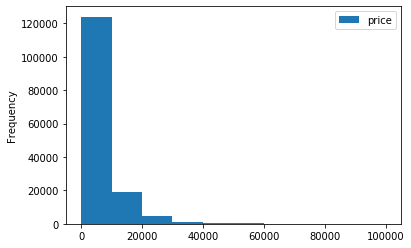

In [66]:
# 检查预测目标 结果是否均衡
# 分类问题才需要
# print('Class',df['Class'].unique())
# # 作分类统计
# sns.countplot(x = 'Class', order = ['L','M','H'], data = df)

In [ ]:
# 非数值数据/分类数据


In [9]:
# 查看数据字段
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [10]:
cols = ['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price']
cols1 = ['model', 'brand', 'bodyType', 'fuelType']
cols2 = ['gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'price']
cols_date = [ 'regDate', 'creatDate']

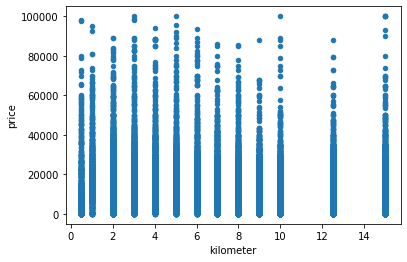

In [12]:
#  # regDate 有用 有用
train_data[['kilometer','price']].plot(kind="scatter",x="kilometer",y="price")

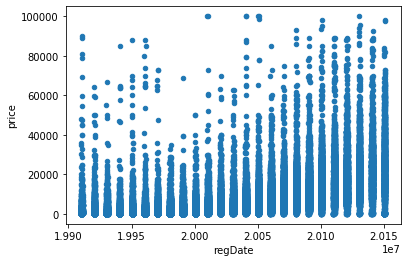

In [13]:
# regDate 有用
train_data[['regDate','price']].plot(kind="scatter",x="regDate",y="price")

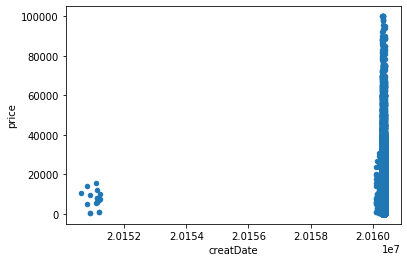

In [14]:
# creatDate 有用
train_data[['creatDate','price']].plot(kind="scatter",x="creatDate",y="price")

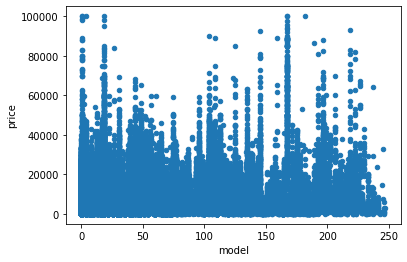

In [15]:
# model 有用
train_data[['model','price']].plot(kind="scatter",x="model",y="price")

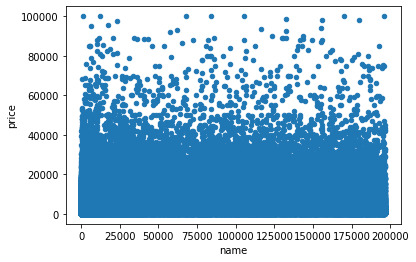

In [16]:
# name 舍弃
train_data[['name','brand','price']].plot(kind="scatter",x="name",y="price")

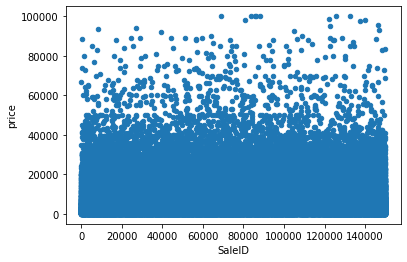

In [17]:
# SaleID 舍弃
train_data[['SaleID','price']].plot(kind="scatter",x="SaleID",y="price")

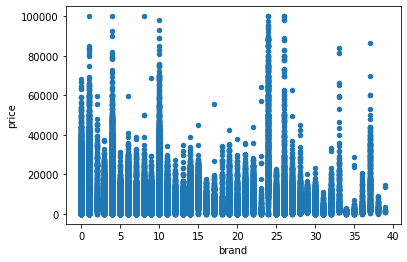

In [18]:
# brand 有用
train_data[['brand','price']].plot(kind="scatter",x="brand",y="price")

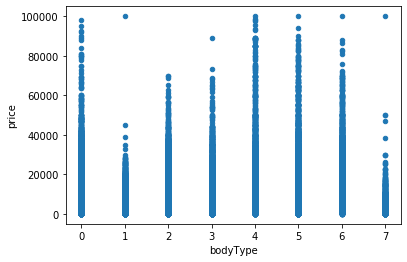

In [19]:
# bodyType 有用
train_data[['bodyType','price']].plot(kind="scatter",x="bodyType",y="price")

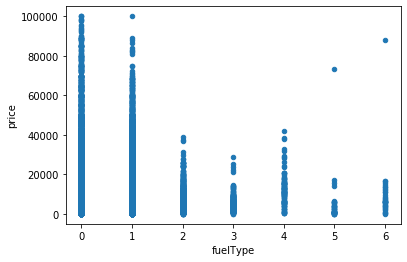

In [20]:
# fuelType 有用
train_data[['fuelType','price']].plot(kind="scatter",x="fuelType",y="price")

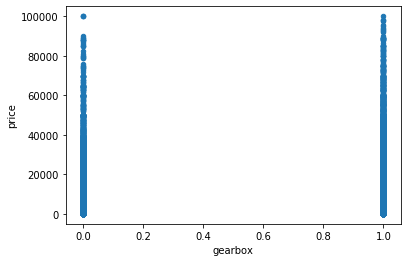

In [21]:
# gearbox 无用？可考虑舍弃
train_data[['gearbox','price']].plot(kind="scatter",x="gearbox",y="price")

In [38]:
df_not_RD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
notRepairedDamage    150000 non-null float64
price                150000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 2.3 MB


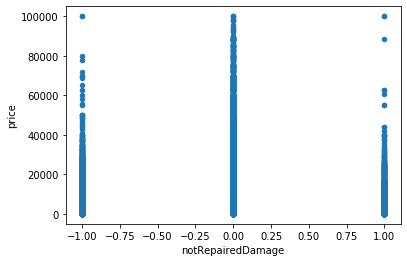

In [40]:
# notRepairedDamage 有用
# df_notre = train_data[['notRepairedDamage','price']].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# df_notre = train_data[['notRepairedDamage','price']].loc[0]+train_data[['notRepairedDamage','price']].loc[2:]
# df_not_RD = train_data[[' notRepairedDamage','price']]
df_not_RD = train_data[['notRepairedDamage','price']]
df_not_RD.replace('-', -1,inplace =True) 
df_not_RD['notRepairedDamage'] = df_not_RD['notRepairedDamage'].astype('float64')

df_not_RD[['notRepairedDamage','price']].plot(kind="scatter",x="notRepairedDamage",y="price")

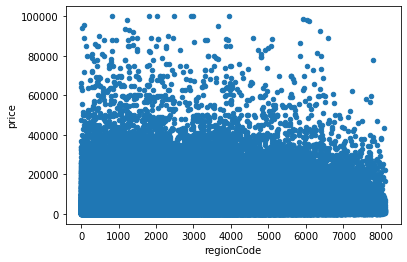

In [41]:
# regionCode 有用
train_data[['regionCode','price']].plot(kind="scatter",x="regionCode",y="price")

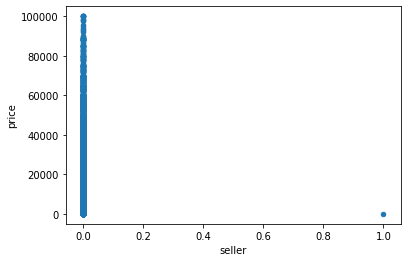

In [42]:
# regionCode 无用
train_data[['seller','price']].plot(kind="scatter",x="seller",y="price")

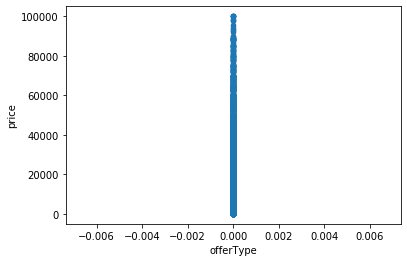

In [44]:
# offerType 无用
train_data[['offerType','price']].plot(kind="scatter",x="offerType",y="price")

In [57]:
cols_baseline = ['regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
        'creatDate', 'price']

In [46]:
train_data_baseline = train_data[cols_baseline]

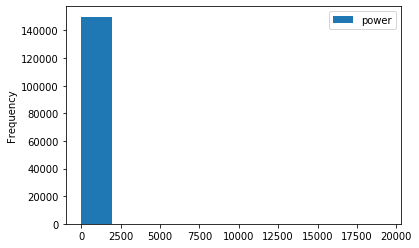

In [91]:
# 查看数据分布
train_data_baseline[['power']].plot(kind="hist")

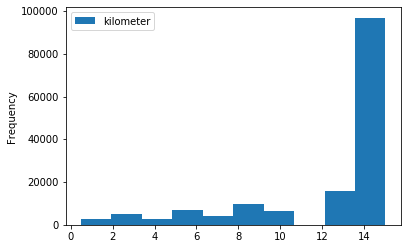

In [92]:
train_data_baseline[['kilometer']].plot(kind="hist")

In [ ]:
train_data_baseline[['price']].plot(kind="hist")

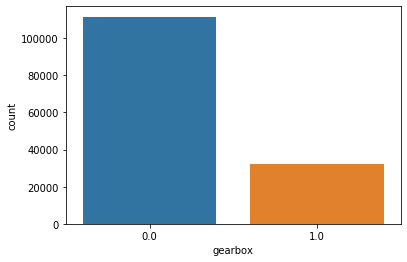

In [83]:
# 分类数据分布
# SaleID	name	regDate	model	brand	bodyType	fuelType	gearbox	power	kilometer	regionCode	seller	offerType	creatDate	price
sns.countplot(x='gearbox', data=train_data_baseline)

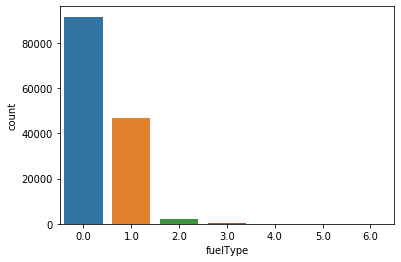

In [85]:
sns.countplot(x='fuelType', data=train_data_baseline)

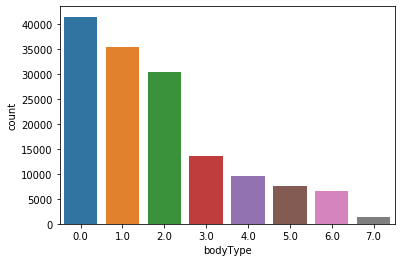

In [84]:
sns.countplot(x='bodyType', data=train_data_baseline)

# 数据的分布分析
0. 初步选取，除匿名字段外可用字段为： 'regDate', 'model', 'brand', 'bodyType', 'fuelType','gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode','creatDate', 'price'
1. power 存在极大异常值，但是lgbm和xgb似乎对异常值不敏感，可以不处理
2. kilometer集中分布在12万千米以后
3. gearbox 手动挡（0）的数量是自动挡数量的4倍
4. fuelType 样本集中在0和1（汽油和柴油车） 
5. bodyType 看着还挺和谐
## emmm,具体说明了什么呢？
1. 需要和测试集去对比，看看数据的分布是否大体一致
2. 还是说要想办法处理成正太分布？

In [76]:
# Correlation Matrix 相关性矩阵
cols_baseline = ['regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
        'creatDate', 'price']
corr = train_data[cols_baseline].corr()
corr

,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,creatDate,price
regDate,1.000000,0.148780,0.033199,0.102864,0.276227,0.142631,0.097446,-0.492852,-0.004783,-0.001293,0.611959
model,0.148780,1.000000,0.358765,0.207208,0.048767,0.019314,0.031245,-0.087445,0.010241,-0.004383,0.136983
brand,0.033199,0.358765,1.000000,0.114116,-0.079566,0.012914,-0.022391,-0.096262,-0.002326,-0.001466,-0.043799
bodyType,0.102864,0.207208,0.114116,1.000000,0.118717,0.099966,0.079632,-0.053212,0.017380,0.002508,0.241303
fuelType,0.276227,0.048767,-0.079566,0.118717,1.000000,0.171692,0.059315,0.099446,-0.012507,-0.001081,0.200536
gearbox,0.142631,0.019314,0.012914,0.099966,0.171692,1.000000,0.156706,-0.046807,-0.022640,-0.002538,0.329075
power,0.097446,0.031245,-0.022391,0.079632,0.059315,0.156706,1.000000,-0.019631,0.004422,0.001280,0.219834
kilometer,-0.492852,-0.087445,-0.096262,-0.053212,0.099446,-0.046807,-0.019631,1.000000,-0.010590,0.004718,-0.440519
regionCode,-0.004783,0.010241,-0.002326,0.017380,-0.012507,-0.022640,0.004422,-0.010590,1.000000,0.002717,0.014036
creatDate,-0.001293,-0.004383,-0.001466,0.002508,-0.001081,-0.002538,0.001280,0.004718,0.002717,1.000000,0.002955


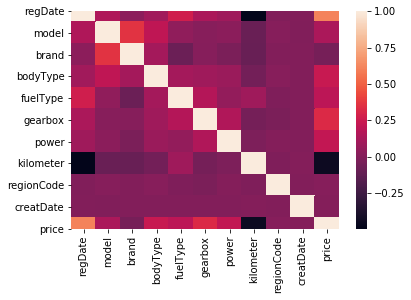

In [77]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 相关性分析
1. 上图可以说明，变量两两之间没有线性相关
2. 可以进一步去分析非线性相关，具体可以去抄参考优秀作业
